## 1.5 Stochastic Gradient Descent

**Stochastic Gradient Descent** (SGD) is a simple and efficient apporach to fitting linear classifiers and regressors under convex loss functions, like linear *Support Vector Machines* and *Logistic Regression*.

SGD has been applied to large-scale and sparse ML problems in text classification and natural language processing. Since the data is sparse, the classifiers here can easily scale to problems with 100K training examples and more than 100K features.

Strictly speaking, SGD is an optimization technique and doesn't correspond to a specific family of ML models; rather it is a *way* to train a model. Often, an instance of `SGDClassifier` or `SGDRegressor` has an equivalent estimator in the scikit-learn API.

For example, using `SGDClassifier(loss='log)` results in logistic regression, that is a model equivalent to `LogisticRegression` which is fitted via SGD rather than one of the other solvers.

Advantages of Stochastic Gradient Descent:
* Efficiency
* Ease of implementation

Disadvantages of SGD:
* Requires lots of hyperparameters like the regularization parameter and the number of iterations
* Sensitive to feature scaling

**ALSO** be sure to permute (shuffle) your training data before fitting the model or use `shuffle=True` to shuffle after each iteration.

### 1.5.1 Classication

The class `SGDClassifier` implements a plain SGD learning routine which supports different loss functions and penalties for classification. Like other classifiers, SGD needs to be fitted with two arrays:
* array `X` of shape `(n_samples, n_features)` holding the training samples
* array `y` of shape `(n_samples)` holding the target values (class labels) for the training samples

Example:

In [1]:
from sklearn.linear_model import SGDClassifier

In [2]:
X = [[0,0],[1,1]]
y = [0,1]

clf = SGDClassifier(loss='hinge', penalty='l2', max_iter=5)
clf.fit(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

After being fitted the model can predict new values:

In [3]:
clf.predict([[2,2]])

array([1])

SGD fits a linear model to the training data. The `coef_` attribute holds the model parameters

In [4]:
clf.coef_

array([[9.91080278, 9.91080278]])

The `intercept_` attribute holds the intercept (bias, offset)

In [5]:
clf.intercept_

array([-9.97004991])

The signed distance to the hyperplane is `SGDClassifier.decision_function`

In [6]:
clf.decision_function([[2,2]])

array([29.67316119])

`SGDClassifier` supports the following `loss=` parameter functions:
* `loss = 'hinge'` soft-margin linear SVM
* `loss = 'modified_huber'` smoothed hinge loss
* `loss = 'log'` logistic regression
* and other regression losses

Using `loss='log'` or `loss='modified-huber'` enables the `predict_proba`
method

In [7]:
clf = SGDClassifier(loss='log', max_iter=5).fit(X, y)
clf.predict_proba([[1,1]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


array([[4.97248476e-07, 9.99999503e-01]])

SGD supports the following penalties:
* `penalty = 'l2'` (default)
* `penalty = 'l1'`
* `penalty = 'elasticnet'`

`SGDClassifier` supports multi-class classification by combining multiple binary classifiers in a "one versus all" (OVA) scheme.

###### Example - SGD: maximum margin separating hyperplane

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

In [9]:
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

In [11]:
#instantiate and fit the model

clf = SGDClassifier(loss='hinge', alpha=0.01, max_iter=200)
clf.fit(X,Y)

SGDClassifier(alpha=0.01, max_iter=200)

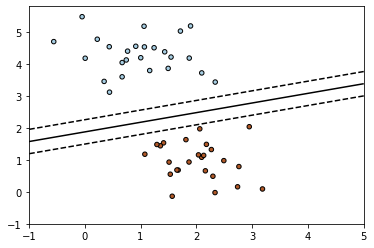

In [12]:
#copypasta
# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
linestyles = ["dashed", "solid", "dashed"]
colors = "k"
plt.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolor="black", s=20)

plt.axis("tight")
plt.show()

###### Example - Plot multi-class SGD on the iris dataset
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py

###### Example - SGD: Weighted samples
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_weighted_samples.html#sphx-glr-auto-examples-linear-model-plot-sgd-weighted-samples-py

###### Example - Comparing various online solvers
https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_comparison.html#sphx-glr-auto-examples-linear-model-plot-sgd-comparison-py

###### Example - SVM: Separating hyperplane for unbalanced classes
https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane_unbalanced.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-unbalanced-py

### 1.5.2 Regression

The class `SGDRegressor` implements a stochastic gradient descent learning routine which supports different loss functions and penalties to fit linear regression models. It's better for regression problems with a large number of training samples (>10,000), and for other problems it's recommended to use Ridge or Lasso or ElasticNet.

`SGDRegressor` supports these loss functions:
* `loss='squared_error'` Ordinary least squares
* `loss='huber'` Huber loss for robust regression
* `loss='epsilon_insensitive'` linear Support Vector Regression

### 1.5.3 Online One-Class SVM
### 1.5.4 Stochastic Gradient Descent for sparse data

Note the sparse implementation produces slightly different results from the dense implementation, due to a shrunk learning rate for the intercept.

There is built-in support for sparse data given in any matrix in a form supported by scipy.sparse

###### Example: Classification of text documents using sparse features
https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py

### 1.5.5 Complexity
### 1.5.6 Stopping criterion

The classes SGDClassifier and SGDRegressor provide two criteria to stop the algorithm wheb a given level of convergence is reached
* `early_stopping=True` input data is split into training set and validation set, model is fitted on the training set, and stopping criterion is based on the prediction `score` computed on the validation set, the size of which can be changed with the parameter `validation_fraction` 
* `early_stopping=False` model is fitted on the entire input data and the stopping criterion is based on the objective function computed on the training data

In both cases the criterion is evaluated once by epoch and the algorithm stops when the criterion does not improve `n_iter_no_change` times in a row. The improvement is evaluated with absolute tolerance `tol` and the algorithm stops after reaching `max_iter` iterations

### 1.5.7 Tips on Practical Use
* SGD is sensitive to feature scaling so it's highly recommended to scale the data
* Finding a reasonable regularization term `alpha` is best done using hyper-parameter search like `GridSearchCV` or `RandomizedSearchCV`
* SGD converges after observing ~1M training samples, so a reasonable guess for first number of iterations is `max_iter = np.ceil(10**6 / n)` where `n` is the size of the training set
* If you apply SGD to features extracted using PCA, it's often helpful to scale the feature values by some constant `c` such that the average L2 norm of the training data equals one
* Averaged SGD works best with a larger number of features and higher eta0

### 1.5.8 Mathematical Formulation
#### 1.5.8.1 SGD
### 1.5.9 Implementation details